<a href="https://colab.research.google.com/github/JoshK68/lung_cancer_classification/blob/main/lung_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

Lung Cancer Status :

0 -- > Yes

1 -- > NO

In [3]:
data  = pd.read_csv('/content/drive/MyDrive/Datasets/Lung_cancer_imaging/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Exploratory data analysis

In [4]:
#Shape of data
print(data.shape)
#dtypes of data
print(data.dtypes)

(309, 16)
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
data.replace({"LUNG_CANCER":{'YES':0,'NO':1}},inplace=True)    ###Yes == 0
#printing the first 5 rows of the df
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [8]:
data['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

In [9]:
data.replace({"GENDER":{'M':0,'F':1}},inplace=True)

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


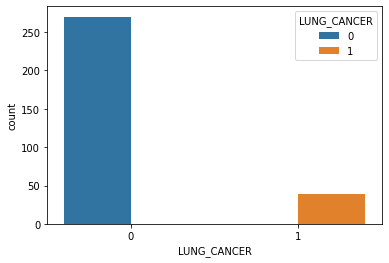

In [10]:
import seaborn as sns

sns.countplot(x='LUNG_CANCER', hue='LUNG_CANCER', data=data); 

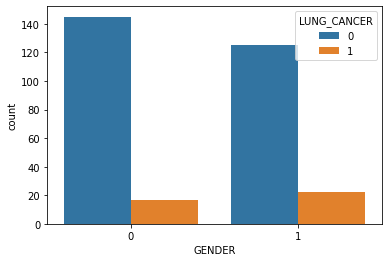

In [11]:
import seaborn as sns
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=data); 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

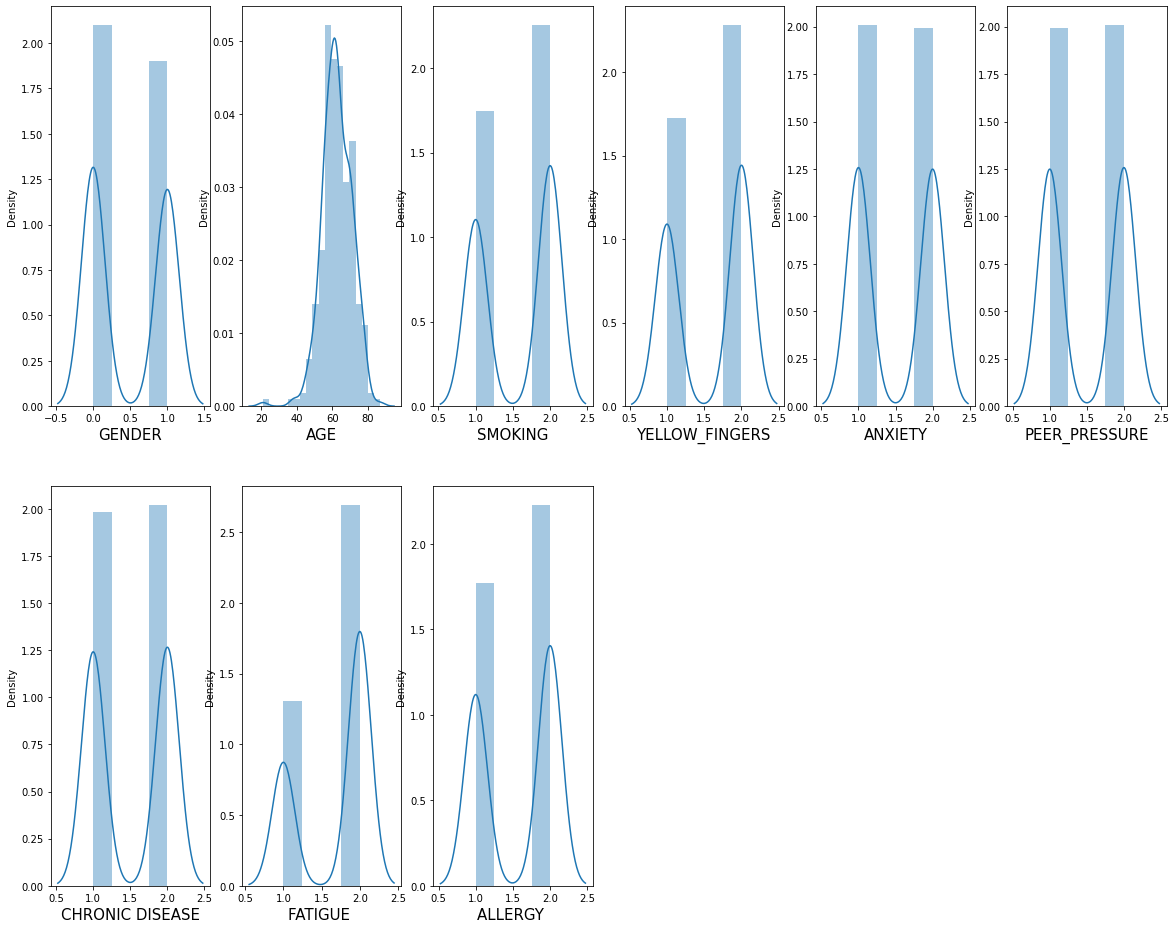

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1   
for column in data:

  if plotnumber <= 9:
    ax = plt.subplot(3, 6, plotnumber)  
    sns.distplot(data[column])  
    plt.xlabel(column, fontsize = 15)

  plotnumber += 1

plt.show();

In [13]:
X = data.drop(columns=['LUNG_CANCER'], axis=1)
y = data['LUNG_CANCER']

In [14]:
print('The shape of X is ', X.shape)
print('The shape of y is ', y.shape)

The shape of X is  (309, 15)
The shape of y is  (309,)


In [15]:
from sklearn.model_selection import train_test_split

#separating into train and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)



print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is', Y_test.shape)   

Shape of X_train is  (247, 15)
Shape of X_test is  (62, 15)
Shape of Y_train is  (247,)
Shape of Y_test is (62,)


In [16]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    216
1     31
Name: LUNG_CANCER, dtype: int64
0    54
1     8
Name: LUNG_CANCER, dtype: int64


Feature Scaling

In [17]:
#scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[:1]

array([[ 1.08012345,  0.63234448, -1.08896313, -1.09788758, -0.94100807,
         1.02045201, -0.97995789,  0.68573909, -1.10689892,  0.88146379,
        -1.14385804,  0.81099822,  0.75052724, -0.89605787,  0.88873791]])

Model Training

In [19]:
#Logistic Regression
#KNN
#SVC
#Decision Tree
#Random Forest Regressor
#XgBoost
#Ada Boost
#Gradient Boosting
#Stochascated Gradient Boosting
#Stacking

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, Y_train)  #pass X then Y to fit
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Logistic Regression Model is {lr_train_acc}')

Training Accuracy of Logistic Regression Model is 0.9352226720647774


In [21]:
#confusion matrix

confusion_matrix(Y_test, y_pred)

array([[52,  2],
       [ 4,  4]])

In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)      

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(Y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of KNN Model is {knn_train_acc}')
print(f'Test Accuracy of KNN Model is {knn_test_acc}')

Training Accuracy of KNN Model is 0.9271255060728745
Test Accuracy of KNN Model is 0.8548387096774194


In [25]:
confusion_matrix(Y_test, y_pred)

array([[53,  1],
       [ 8,  0]])

In [26]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.00      0.00      0.00         8

    accuracy                           0.85        62
   macro avg       0.43      0.49      0.46        62
weighted avg       0.76      0.85      0.80        62



SVC

In [27]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of SVC Model is {svc_train_acc}') 
print(f'Test Accuracy of SVC Model is {svc_test_acc}') 

Training Accuracy of SVC Model is 0.9473684210526315
Test Accuracy of SVC Model is 0.8870967741935484


In [28]:
confusion_matrix(Y_test, y_pred)

array([[53,  1],
       [ 6,  2]])

In [29]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.67      0.25      0.36         8

    accuracy                           0.89        62
   macro avg       0.78      0.62      0.65        62
weighted avg       0.87      0.89      0.86        62



DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Decision Tree Model is {dtc_train_acc}')
print(f'Test Accuracy of Decision Tree Model is {dtc_test_acc}')

Training Accuracy of Decision Tree Model is 0.9959514170040485
Test Accuracy of Decision Tree Model is 0.9516129032258065


In [32]:
confusion_matrix(Y_test, y_pred)

array([[54,  0],
       [ 3,  5]])

In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.62      0.77         8

    accuracy                           0.95        62
   macro avg       0.97      0.81      0.87        62
weighted avg       0.95      0.95      0.95        62



Hyper parameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.9027755102040815


In [36]:
dtc = grid_search.best_estimator_  

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
atc_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Decision Tree Model is {dtc_train_acc}')
print(f'Test Accuracy of Decision Tree Model is {dtc_test_acc}')

Training Accuracy of Decision Tree Model is 0.9149797570850202
Test Accuracy of Decision Tree Model is 0.9516129032258065


Visualization of the DTC tree.

[Text(0.6710526315789473, 0.9166666666666666, 'X[8] <= -0.102\ngini = 0.22\nsamples = 247\nvalue = [216, 31]'),
 Text(0.4473684210526316, 0.75, 'X[13] <= 0.11\ngini = 0.368\nsamples = 111\nvalue = [84, 27]'),
 Text(0.2631578947368421, 0.5833333333333334, 'X[11] <= -0.211\ngini = 0.488\nsamples = 57\nvalue = [33, 24]'),
 Text(0.15789473684210525, 0.4166666666666667, 'X[4] <= 0.061\ngini = 0.48\nsamples = 30\nvalue = [12, 18]'),
 Text(0.10526315789473684, 0.25, 'X[6] <= 0.02\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.21052631578947367, 0.25, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.3684210526315789, 0.4166666666666667, 'X[7] <= -0.386\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.3157894736842105, 0.25, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.4210526315

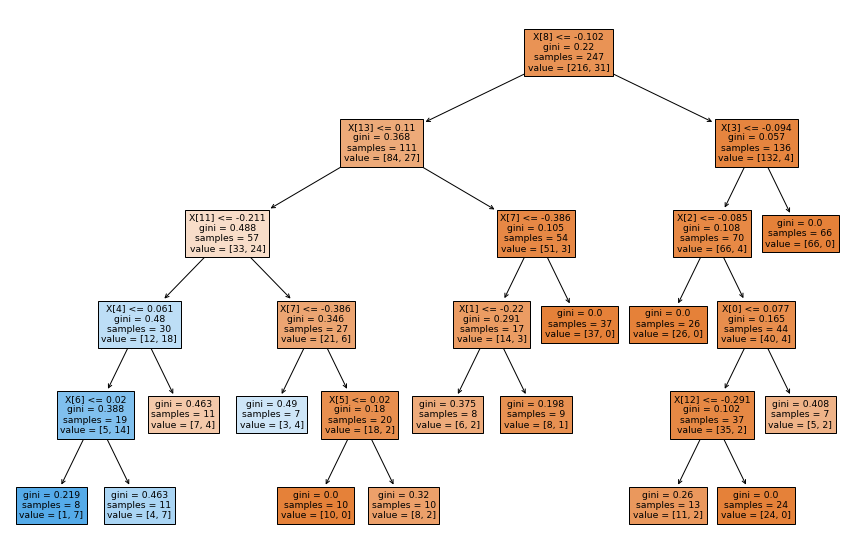

In [37]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dtc, filled=True)

Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt',
                                  min_samples_leaf = 2, min_samples_split=4, n_estimators = 180)

rand_clf.fit(X_train, Y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Random Forest Model is {rand_clf_train_acc}')
print(f' Test Accuracy of Random Forest Model is {rand_clf_test_acc}')

Training Accuracy of Random Forest Model is 0.902834008097166
 Test Accuracy of Random Forest Model is 0.8548387096774194


In [39]:
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=1)  
kfitModel = k_model.fit(X_train, Y_train)  



kX_train_prediction = kfitModel.predict(X_train)
training_data_accuracy = accuracy_score(kX_train_prediction, Y_train)

print('Accuracy on training data: ', training_data_accuracy)



kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuracy = accuracy_score(kX_test_prediction, Y_test)
print('Accuracy on test data: ', kx_lgr_test_data_accuracy)

Accuracy on training data:  0.9959514170040485
Accuracy on test data:  0.9354838709677419


Boosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)  

parameters = {
    
    'n_estimators': [50, 70, 90, 120, 180, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                min_samples_leaf=7)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 1.0],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 180}
0.9030204081632652


In [42]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 0.1, n_estimators = 180)

In [43]:
ada.fit(X_train, Y_train)

ada_train_acc = accuracy_score(Y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Ada Boost Model is {ada_train_acc}')
print(f'Test Accuracy of Ada Boost Model is {ada_test_acc}')

Training Accuracy of Ada Boost Model is 0.9959514170040485
Test Accuracy of Ada Boost Model is 0.8548387096774194


In [44]:
confusion_matrix(Y_test, y_pred)

array([[53,  1],
       [ 8,  0]])

In [45]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.00      0.00      0.00         8

    accuracy                           0.85        62
   macro avg       0.43      0.49      0.46        62
weighted avg       0.76      0.85      0.80        62



In [46]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [48]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 100}
0.8870204081632653


In [49]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train, Y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(Y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}')
print(f'Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}')

Training Accuracy of Gradient Boosting Classifier Model is 0.9959514170040485
Test Accuracy of Gradient Boosting Classifier Model is 0.9193548387096774


In [50]:
confusion_matrix(Y_test, y_pred)

array([[54,  0],
       [ 5,  3]])

In [51]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.38      0.55         8

    accuracy                           0.92        62
   macro avg       0.96      0.69      0.75        62
weighted avg       0.93      0.92      0.90        62



Stochastic Gradient Boosting

In [52]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss='deviance', n_estimators=100)
sgbc.fit(X_train, Y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(Y_train, sgbc.predict(X_train))

sgbc_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of SGB Model is {sgbc_train_acc}')
print(f'Test Accuracy of SGB Model is {sgbc_test_acc}')

Training Accuracy of SGB Model is 0.9919028340080972
Test Accuracy of SGB Model is 0.8870967741935484


In [53]:
confusion_matrix(Y_test, y_pred)

array([[52,  2],
       [ 5,  3]])

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.60      0.38      0.46         8

    accuracy                           0.89        62
   macro avg       0.76      0.67      0.70        62
weighted avg       0.87      0.89      0.88        62



In [55]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [56]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 30, learning_rate = 0.1)
cat.fit(X_train, Y_train)

y_pred = cat.predict(X_test)

0:	learn: 0.6666275	total: 47.1ms	remaining: 1.37s
1:	learn: 0.6186676	total: 47.3ms	remaining: 662ms
2:	learn: 0.5936300	total: 48.3ms	remaining: 434ms
3:	learn: 0.5692026	total: 52.1ms	remaining: 339ms
4:	learn: 0.5465985	total: 53.3ms	remaining: 267ms
5:	learn: 0.5279051	total: 55.4ms	remaining: 222ms
6:	learn: 0.5073203	total: 57.3ms	remaining: 188ms
7:	learn: 0.4884960	total: 59.2ms	remaining: 163ms
8:	learn: 0.4706831	total: 64ms	remaining: 149ms
9:	learn: 0.4474004	total: 64.2ms	remaining: 128ms
10:	learn: 0.4332524	total: 65.1ms	remaining: 112ms
11:	learn: 0.4208699	total: 67.7ms	remaining: 102ms
12:	learn: 0.4084903	total: 75ms	remaining: 98.1ms
13:	learn: 0.3971856	total: 78.3ms	remaining: 89.5ms
14:	learn: 0.3838569	total: 78.8ms	remaining: 78.8ms
15:	learn: 0.3760607	total: 81.5ms	remaining: 71.3ms
16:	learn: 0.3683642	total: 87.2ms	remaining: 66.7ms
17:	learn: 0.3597879	total: 88.2ms	remaining: 58.8ms
18:	learn: 0.3517384	total: 89.1ms	remaining: 51.6ms
19:	learn: 0.344701

In [57]:
cat_train_acc = accuracy_score(Y_train, cat.predict(X_train))
cat_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of Cat Boost Classifier Model is {cat_train_acc}')
print(f'Test Accuracy of Cat Boost Classifier Model is {cat_test_acc}')

Training Accuracy of Cat Boost Classifier Model is 0.9311740890688259
Test Accuracy of Cat Boost Classifier Model is 0.8548387096774194


XGB Classifier

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, y_pred)

print(f'Training Accuracy of XGB Model is {xgb_train_acc}')
print(f'Test Accuracy of XGB Model is {xgb_test_acc}')

Training Accuracy of XGB Model is 0.8744939271255061
Test Accuracy of XGB Model is 0.8709677419354839


Stacking

In [59]:
from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state=32)

In [60]:
#Let's split the training set again into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [61]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [62]:
# using Logisitic Regression and SVM algorithm as base models.
# Let's fit both of the models first on the X_train and y_train data.

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [63]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

In [64]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [65]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

In [66]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [67]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [68]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.9032258064516129


In [69]:
confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[28,  0],
       [ 3,  0]])

In [70]:
#classifation report

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.00      0.00      0.00         3

    accuracy                           0.90        31
   macro avg       0.45      0.50      0.47        31
weighted avg       0.82      0.90      0.86        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Stacking', 'Cat Boost']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgbc_test_acc, xgb_test_acc, stacking_acc, cat_test_acc]

models = pd.DataFrame({'Model': models, 'Score': scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,0.951613
6,Gradient Boosting,0.919355
0,Logistic Regression,0.903226
9,Stacking,0.903226
2,SVC,0.887097
7,SGB,0.887097
8,XgBoost,0.870968
1,KNN,0.854839
4,Random Forest,0.854839
5,Ada Boost,0.854839


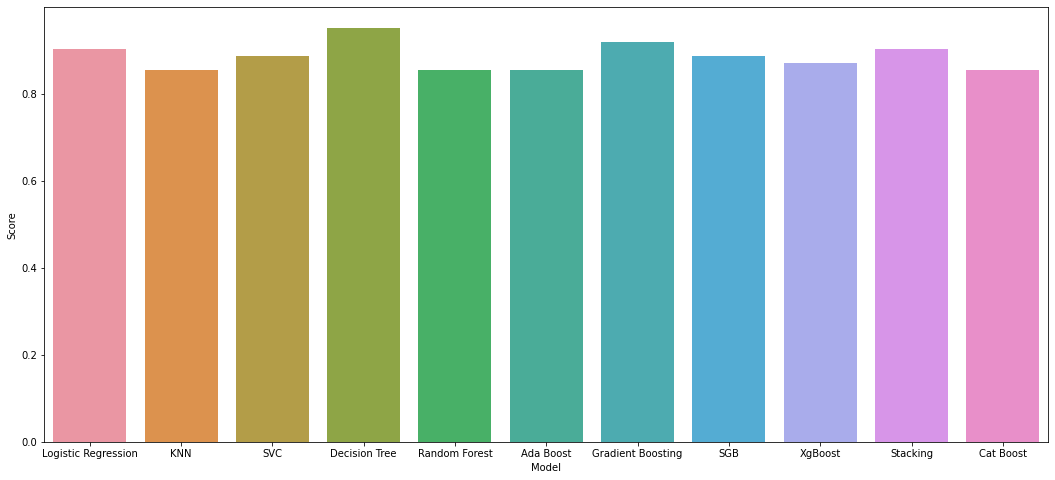

In [72]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [73]:
#Decision Tree gives us the best result so we will save this model for production.